In [38]:
import pandas as pd
import numpy as np

In [108]:
df = pd.read_excel('Data.xlsx')
df

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
1     49   F           NAP        160          180          0     Normal   
2     37   M           ATA        130          283          0         ST   
3     48   F           ASY        138          214          0     Normal   
4     54   M           NAP        150          195          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0      172              N      0.0       Up             0  
1      156              N      1.0     Flat             1  
2       98              N      0.0       Up             0  
3      108              Y      1.5     Flat             1  
4      122              N      0.0       Up             0  
..     ...            ...      ...      ...           ...  
913    132              N      1.2     Flat             1  
914    141              N      3.4     Flat             1  
915    115              Y      1.2     Flat             1  
916    174              N      0.0     Flat             1  
917    173              N      0.0       Up             0  

[918 rows x 12 columns]

# Data preparation

In [40]:
lacksofdata = df.isnull().any()
lacksofdata

Age               False
Sex               False
ChestPainType     False
RestingBP         False
Cholesterol       False
FastingBS         False
RestingECG        False
MaxHR             False
ExerciseAngina    False
Oldpeak           False
ST_Slope          False
HeartDisease      False
dtype: bool

In [41]:
print(df['ChestPainType'].unique())
print(df['RestingECG'].unique())
print(df['ExerciseAngina'].unique())
print(df['ST_Slope'].unique())

['ATA' 'NAP' 'ASY' 'TA']
['Normal' 'ST' 'LVH']
['N' 'Y']
['Up' 'Flat' 'Down']


In [42]:
map_paintype = {'ATA': 0,'NAP':0.33, 'ASY':0.66,'TA':1 }
map_restingecg = {'Normal': 0, 'ST':0.5,'LVH':1}
map_exercise = {'N': 0,'Y':1}
map_stslope = {'Up': 0, 'Flat' : 0.5, 'Down':1}
map_sex = {'M': 0, 'F': 1}

In [43]:
df['ChestPainType'] = df['ChestPainType'].map(map_paintype)
df['RestingECG'] = df['RestingECG'].map(map_restingecg)
df['ExerciseAngina'] = df['ExerciseAngina'].map(map_exercise)
df['ST_Slope'] = df['ST_Slope'].map(map_stslope)
df['Sex'] = df['Sex'].map(map_sex)
df

Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0     40    0           0.00        140          289          0         0.0   
1     49    1           0.33        160          180          0         0.0   
2     37    0           0.00        130          283          0         0.5   
3     48    1           0.66        138          214          0         0.0   
4     54    0           0.33        150          195          0         0.0   
..   ...  ...            ...        ...          ...        ...         ...   
913   45    0           1.00        110          264          0         0.0   
914   68    0           0.66        144          193          1         0.0   
915   57    0           0.66        130          131          0         0.0   
916   57    1           0.00        130          236          0         1.0   
917   38    0           0.33        138          175          0         0.0   

     MaxHR  ExerciseAngina  Oldpeak  ST_Slope  HeartDisease  
0      172               0      0.0       0.0             0  
1      156               0      1.0       0.5             1  
2       98               0      0.0       0.0             0  
3      108               1      1.5       0.5             1  
4      122               0      0.0       0.0             0  
..     ...             ...      ...       ...           ...  
913    132               0      1.2       0.5             1  
914    141               0      3.4       0.5             1  
915    115               1      1.2       0.5             1  
916    174               0      0.0       0.5             1  
917    173               0      0.0       0.0             0  

[918 rows x 12 columns]

In [44]:
x = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

# Pandas profiling

In [106]:
from pandas_profiling import ProfileReport

`import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.


In [111]:
profile = ProfileReport(df, title='hearthproblem', html={'style':{'full_width':True}})
profile.to_notebook_iframe()
profile.to_file('raportheart.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# Data split

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Model SVM creation and fit 

In [80]:
from sklearn.svm import SVC
model=SVC(kernel="linear")
model.fit(X_train,y_train)

SVC(kernel='linear')

In [81]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.8315217391304348

# Gridsearch SVM

In [61]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)
best_C = grid_search.best_params_['C']
best_accuracy = grid_search.best_score_

In [63]:
best_svm_model = SVC(kernel='linear', C=best_C)
best_svm_model.fit(X_train, y_train)

test_accuracy = best_svm_model.score(X_test, y_test)
test_accuracy

0.8315217391304348

# Model RF creation and fit 

In [92]:
from sklearn.ensemble import RandomForestClassifier

# Tworzenie klasyfikatora Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Trenowanie modelu na danych treningowych
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [93]:
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8858695652173914

# Gridsearch RF

In [94]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Utworzenie obiektu GridSearchCV z modelem Random Forest i zestawem hiperparametrów
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

In [95]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]},
             scoring='accuracy')

In [96]:
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_
best_accuracy

0.8828254589507036

In [97]:
best_rf_model = grid_search.best_estimator_
y_pred = best_rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8695652173913043

# Visualization SVM

## ROC

In [82]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

In [83]:
y_prob = model.decision_function(X_test)


fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

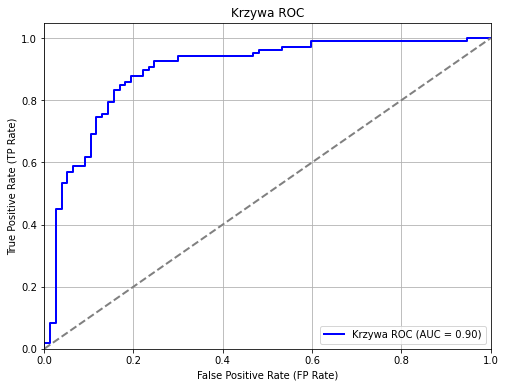

In [84]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', lw=2, label='Krzywa ROC (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FP Rate)')
plt.ylabel('True Positive Rate (TP Rate)')
plt.title('Krzywa ROC')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Heatmap

In [85]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

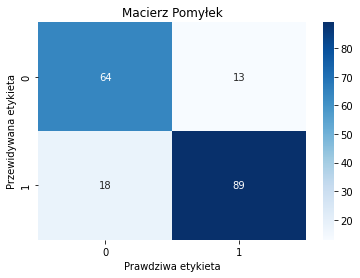

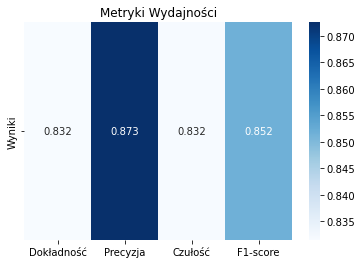

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
plt.title('Macierz Pomyłek')
plt.xlabel('Prawdziwa etykieta')
plt.ylabel('Przewidywana etykieta')
plt.show()

data = [[accuracy, precision, recall, f1]]
index = ['Wyniki']
columns = ['Dokładność', 'Precyzja', 'Czułość', 'F1-score']
df_mat = pd.DataFrame(data, index=index, columns=columns)

sns.heatmap(df_mat, annot=True, cmap='Blues', fmt='.3f')
plt.title('Metryki Wydajności')
plt.show()

# Features importance

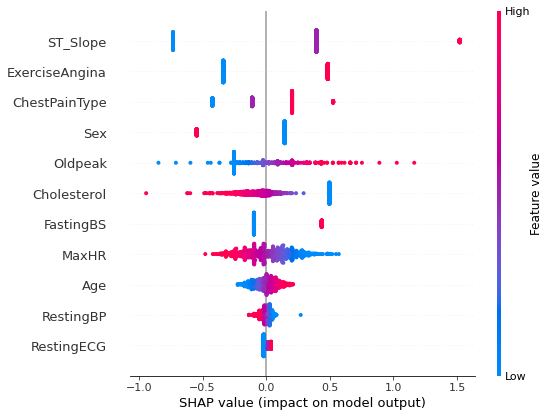

In [87]:
import shap
explainer = shap.Explainer(model,X_train)
shap_values = explainer(X_train.values)
expected_value = explainer.expected_value
shap.summary_plot(shap_values, X_train, feature_names=features)

In [88]:
features = X_train.columns.tolist()
type(features)

list

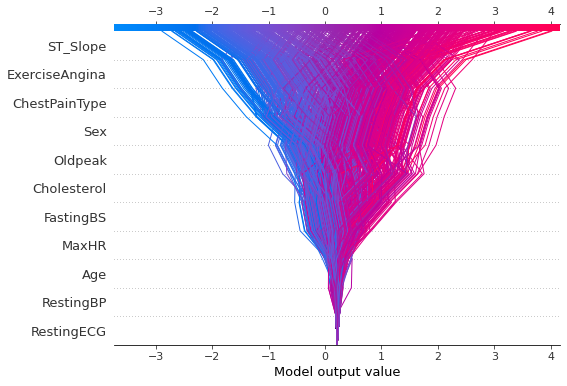

In [89]:
shap.decision_plot(explainer.expected_value, explainer.shap_values(X_train), feature_names=features)

# Visualization Random Forest

## ROC

In [99]:
from sklearn.metrics import roc_curve, auc
y_prob = rf_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

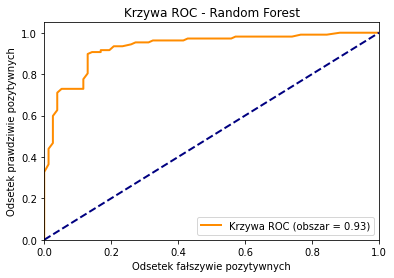

In [100]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Krzywa ROC (obszar = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Odsetek fałszywie pozytywnych')
plt.ylabel('Odsetek prawdziwie pozytywnych')
plt.title('Krzywa ROC - Random Forest')
plt.legend(loc="lower right")
plt.show()

## Heatmap Random Forest

In [101]:
conf_matrix = confusion_matrix(y_test, y_pred)

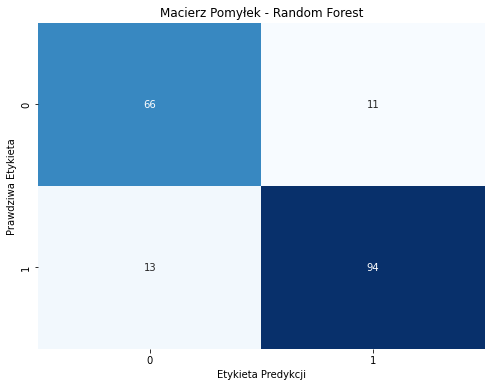

In [102]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Etykieta Predykcji")
plt.ylabel("Prawdziwa Etykieta")
plt.title("Macierz Pomyłek - Random Forest")
plt.show()

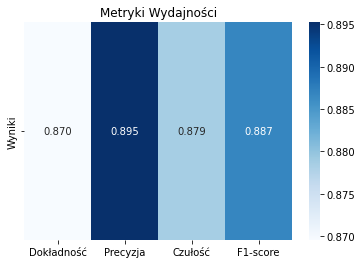

In [105]:
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
data = [[accuracy, precision, recall, f1]]
index = ['Wyniki']
columns = ['Dokładność', 'Precyzja', 'Czułość', 'F1-score']
df_mat = pd.DataFrame(data, index=index, columns=columns)

sns.heatmap(df_mat, annot=True, cmap='Blues', fmt='.3f')
plt.title('Metryki Wydajności')
plt.show()